In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [2]:
import numpy as np
from matplotlib import pyplot

In [3]:
(xtrain, ytrain), (xtest, ytest) = load_data()

In [4]:
print(f'Train: x={xtrain.shape} y={ytrain.shape}')
print(f'Test: x={xtest.shape} y={ytest.shape}')

Train: x=(60000, 28, 28) y=(60000,)
Test: x=(10000, 28, 28) y=(10000,)


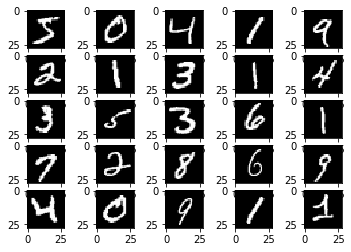

In [5]:
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.imshow(xtrain[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [6]:
x_train = xtrain[:,:,:,np.newaxis]
x_test = xtest[:,:,:,np.newaxis]

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32');

In [8]:
x_train /= 255
x_test /= 255

In [9]:
classes = len(np.unique(ytrain))
in_shape = x_train.shape[1:]

In [10]:
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
cnn.add(MaxPool2D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.5))
cnn.add(Dense(classes, activation='softmax'))

In [11]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn.fit(x=x_train, y=ytrain, batch_size=64, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2952 - accuracy: 0.9096
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1317 - accuracy: 0.9610
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1007 - accuracy: 0.9699
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0818 - accuracy: 0.9743
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0706 - accuracy: 0.9780
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0650 - accuracy: 0.9795
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0569 - accuracy: 0.9816
Epoch 8/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0497 - accuracy: 0.9841
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0441 - accuracy: 0.9852
Epoch 10/10
6

In [13]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.utils import plot_model

In [25]:
lenet5 = Sequential()
lenet5.add(Conv2D(6, (5,5), strides=(1,1), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
lenet5.add(AveragePooling2D())
lenet5.add(Conv2D(16, (5,5), strides=(1,1), activation='relu', kernel_initializer='he_uniform'))
lenet5.add(AveragePooling2D())
lenet5.add(Flatten())
lenet5.add(Dense(120,activation='relu', kernel_initializer='he_uniform'))
lenet5.add(Dense(84,activation='relu', kernel_initializer='he_uniform'))
lenet5.add(Dense(classes, activation='softmax'))

In [26]:
lenet5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = lenet5.fit(x=x_train, y=ytrain, batch_size=128, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 50us/sample - loss: 0.3455 - accuracy: 0.8948 - val_loss: 0.1310 - val_accuracy: 0.9622
Epoch 2/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.1108 - accuracy: 0.9665 - val_loss: 0.0858 - val_accuracy: 0.9736
Epoch 3/10
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0974 - val_accuracy: 0.9698
Epoch 4/10
48000/48000 [==============================] - 2s 38us/sample - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0654 - val_accuracy: 0.9810
Epoch 5/10
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.0749 - val_accuracy: 0.9789
Epoch 6/10
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0566 - val_accuracy: 0.9823
Epoch 7/10
48000/48000 [==============================] 

In [17]:
lenet5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

In [18]:
cnn.evaluate(x=x_test, y=ytest)

10000/10000 [==============================] - 1s 108us/sample - loss: 0.0412 - accuracy: 0.9873


[0.041211882300056825, 0.9873]

In [19]:
lenet5.evaluate(x=x_test, y=ytest)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.0357 - accuracy: 0.9882


[0.035679073422130024, 0.9882]

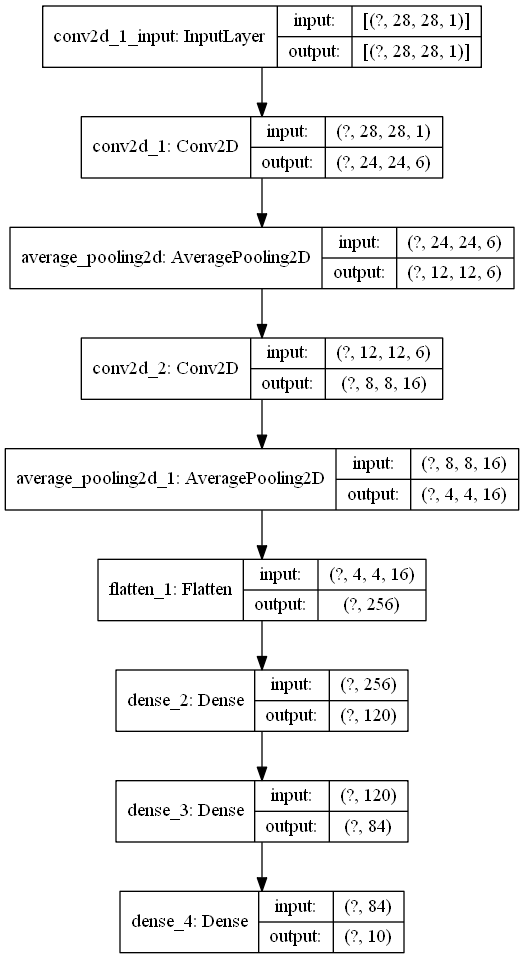

In [21]:
plot_model(lenet5, show_shapes=True)

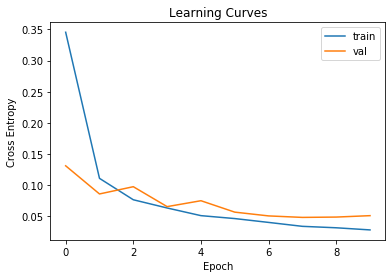

In [28]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

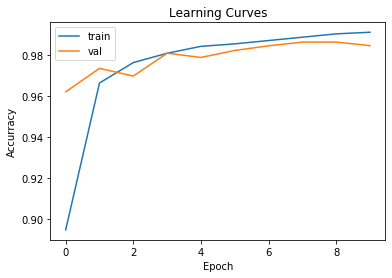

In [31]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accurracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()